<a href="https://colab.research.google.com/github/EfaOnyianta/Stroke-Analysis-and-risk-factors-/blob/main/Project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Data used was sourced from
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download Stroke Prediction Dataset 11 clinical features for predicting stroke events FEDESORIANO

The data we will be analyzing is Stroke predictions. These predictions will be calculated using sex, age, smoking habits, bmi and other features to predict if a person has had a stroke, and and if there is any correlation to these features and a persons risk factors to the development of the disease. Hopefully with this data analyzation we will be better able to predict if a patient has had a stroke, make sure the model is a good fit for this type of data, keep the false negative sna dfalse positve s to a very low percentage and hopefully with this data prevent the development of stroke in others.

I chose a medicine related data set because i would like to go into medical tech with my data analysis, and I find medicine interesting since i have been in the field for the past 8 years, and on these topics im very knowlegable.

In [2]:
# Loading Data and displaying first 5 rows 
path = '/content/healthcare-dataset-stroke-data[1].csv'
df = pd.read_csv('/content/healthcare-dataset-stroke-data[1].csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We need to make a copy of the original to avoid manipulations

In [3]:
#save copy 
stroke_df = df.copy()

In [4]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#Checking for duplicates, missing values, dropping dupes and replacing missing values

In [5]:
#get sum of missing values in dataframs
stroke_df.isna().sum().sum()

201

In [6]:
#display sum of missing values per column
stroke_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

All the missing data is in BMI. Knowing what i know there is a correleation between BMI and stroke risk, im goign to fill the numeric data with the mean since bmi is a float data type

In [7]:
mean_bmi = df['bmi'].mean()
stroke_df['bmi'].fillna(mean_bmi, inplace=True)
stroke_df.isna().sum()
#great that handled the missing values in BMI

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
stroke_df.duplicated().sum()
#no duplicates so no need to drop them

0

In [9]:
#now im goign to display stats for catgorical columns
stroke_df.describe(include = 'object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


in looking at the categorical columns nothign is really relevant besides gender and smoking status. I'll probably drop 'ever married', 'work type' and 'residence type'. 

In [10]:
#now im going to check the values in the columns i chose to keep 'gender' and 'smoking status'
stroke_df.value_counts('gender')
#nothing is weird here data checks out with dictionary

gender
Female    2994
Male      2115
Other        1
dtype: int64

In [11]:
stroke_df.value_counts('smoking_status')
#no weird values either 

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
dtype: int64

There are no missing values or any more data inconsistencies. Ill make models of the target (stroke) and the features, age, gender, hypertension, heart disease, avg glusoce, bmi and smoking status. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


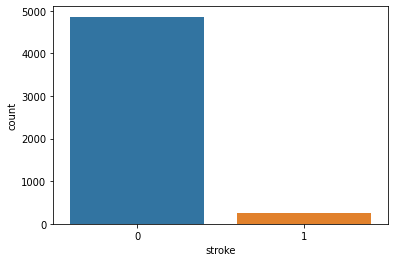

In [12]:
sns.countplot(stroke_df['stroke'])
#stroke: 1 if the patient had a stroke or 0 if not

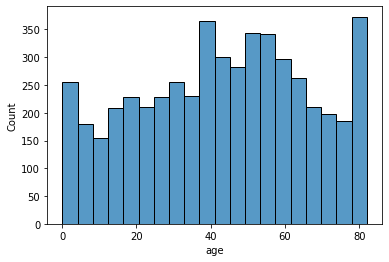

In [14]:
sns.histplot(data=stroke_df, x='age');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


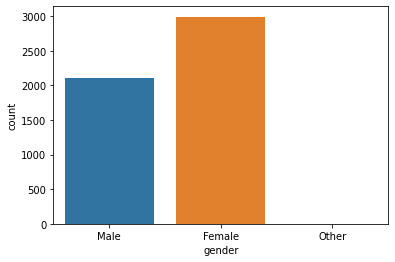

In [15]:
sns.countplot(stroke_df['gender'])

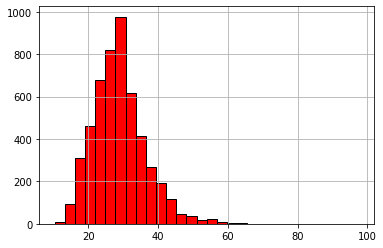

In [34]:
stroke_df['bmi'].hist(color='red',bins=30,
                           edgecolor='k')

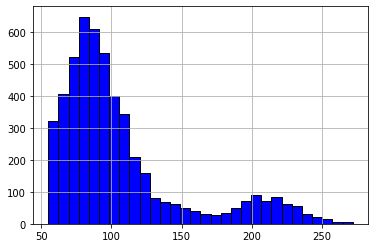

In [36]:
stroke_df['avg_glucose_level'].hist(color  ='blue',bins= 30,
                             edgecolor='k')

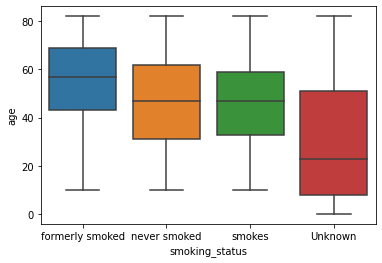

In [33]:
from itertools import count
sns.boxplot(data=stroke_df,y= 'age',x ='smoking_status'); 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


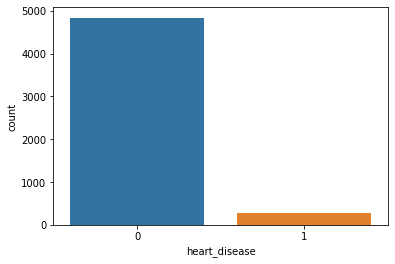

In [37]:
sns.countplot(stroke_df['heart_disease'])
#The stroke and heart disease graphs are almost identical. There is a known correletion betwene heart disease and stroke but a nice heat map in the future will show how much the correlation is. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


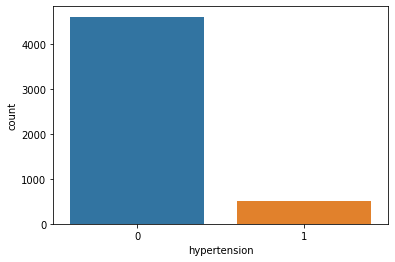

In [38]:
sns.countplot(stroke_df['hypertension'])
# the hypertension graph also looks very similar too so im curious to  see how mcuh correlation there is between these features and stroke. 

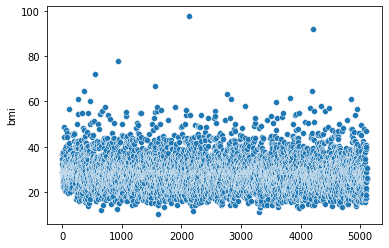

In [44]:
sns.scatterplot(x= stroke_df.index, y = stroke_df['bmi'])
#the outlier in BMI are bmi's in the 90's / close to 100. I cant say confidently if those are odd values because a person can have a bmi of 99 and be deemed severely morbidly obese. 